## Exploratory Data Analysis
*for Abusive Chat Prediction project*

#### Load Packages

In [1]:
import pandas as pd
import numpy as np
import requests
import io
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Load Data

In [2]:
# Download train.csv data from GitHub
files = ['mapping.txt', 'test_labels.txt', 'test_text.txt', 'train_labels.txt',
         'train_text.txt', 'val_labels.txt', 'val_text.txt']
folders = ['hate', 'offensive']
base_url = "https://raw.githubusercontent.com/ssears219/Abusive-Chat-Detection/main/Data/Raw%20Data/"

##### Hate Label Mapping

In [3]:
file = requests.get(base_url+folders[0]+"/"+files[0]).content
hate_mapping = pd.read_csv(io.StringIO(file.decode('utf-8')), delimiter = "\t", header=None)
print(hate_mapping[0][0], "=", hate_mapping[1][0])
print(hate_mapping[0][1], "=", hate_mapping[1][1])

0 = not-hate
1 = hate


##### Offensive Label Mapping

In [4]:
file = requests.get(base_url+folders[1]+"/"+files[0]).content
offensive_mapping = pd.read_csv(io.StringIO(file.decode('utf-8')), delimiter = "\t", header=None)
print(offensive_mapping[0][0], "=", offensive_mapping[1][0])
print(offensive_mapping[0][1], "=", offensive_mapping[1][1])

0 = not-offensive
1 = offensive


##### Hate Tweet Dataframe

In [5]:
hate_x = []
for i in range(2, len(files), 2):
    data = requests.get(base_url+folders[0]+"/"+files[i]).text
    data = data.split('\n')
    data.pop()
    hate_x.extend(data)
    print(files[i], len(data), 'tweets')
hate_y = []

for i in range(1, len(files), 2):
    data = requests.get(base_url+folders[0]+"/"+files[i]).text
    data = data.split('\n')
    data.pop()
    hate_y.extend(data)
    print(files[i], len(data), 'labels')
    
hate_df = pd.DataFrame({'Tweet': hate_x, 'Hate': hate_y})
hate_df['Hate'] = hate_df['Hate'].astype(int)
print()
print('Combined data -', hate_df.shape[0], 'rows')

test_text.txt 2970 tweets
train_text.txt 9000 tweets
val_text.txt 1000 tweets
test_labels.txt 2970 labels
train_labels.txt 9000 labels
val_labels.txt 1000 labels

Combined data - 12970 rows


In [6]:
hate_df.head(10)

,Tweet,Hate
0,"@user , you are correct that Reid certainly is...",0
1,Whoever just unfollowed me you a bitch,1
2,@user @user Those People Invaded Us!!! They DO...,1
3,"stop JUDGING bitches by there cover, jus cuz s...",1
4,how about i knock heads off and send them gift...,1
5,@user @user @user Always #NoDACA.I AM BORN IN ...,0
6,@user friends ? that's my BLOOD brother bitch ...,0
7,"@user @user Muslims attacked US on 9/11, 3000 ...",1
8,@user @user Like he ever kept out any threats....,0
9,#germany deserves to called #cuck/land they al...,1


##### Offensive Tweet Dataframe

In [7]:
offensive_x = []
for i in range(2, len(files), 2):
    data = requests.get(base_url+folders[1]+"/"+files[i]).text
    data = data.split('\n')
    data.pop()
    offensive_x.extend(data)
    print(files[i], len(data), 'tweets')
    
offensive_y = []
for i in range(1, len(files), 2):
    data = requests.get(base_url+folders[1]+"/"+files[i]).text
    data = data.split('\n')
    data.pop()
    offensive_y.extend(data)
    print(files[i], len(data), 'labels')
    
offensive_df = pd.DataFrame({'Tweet': offensive_x, 'Offensive': offensive_y})
offensive_df['Offensive'] = offensive_df['Offensive'].astype(int)
print()
print('Combined data -', offensive_df.shape[0], 'rows')

test_text.txt 860 tweets
train_text.txt 11916 tweets
val_text.txt 1324 tweets
test_labels.txt 860 labels
train_labels.txt 11916 labels
val_labels.txt 1324 labels

Combined data - 14100 rows


In [8]:
offensive_df.head(10)

,Tweet,Offensive
0,#ibelieveblaseyford is liar she is fat ugly li...,1
1,@user @user @user I got in a pretty deep debat...,0
2,"...if you want more shootings and more death, ...",0
3,Angels now have 6 runs. Five of them have come...,0
4,#Travel #Movies and Unix #Fortune combined Vi...,0
5,#naturephotography. #nature. #birds #wild in #...,0
6,#i2 This speaks for itself (NSFW),0
7,#WomenWednesday: Meet multiple-award-winning d...,0
8,". a grown ass woman, probably 10 years older t...",1
9,#RAP is a form of ART! Used to express yoursel...,0


### Load Profanity Data

In [9]:
data = requests.get('http://www.bannedwordlist.com/lists/swearWords.txt').text
data = data.split('\n')
data = [val.replace('\r', '').lower() for val in data]
print(len(data), 'profanity words loaded')

profanity_df = pd.DataFrame({'Word': data})

77 profanity words loaded


### Hate Tweet Word Cloud

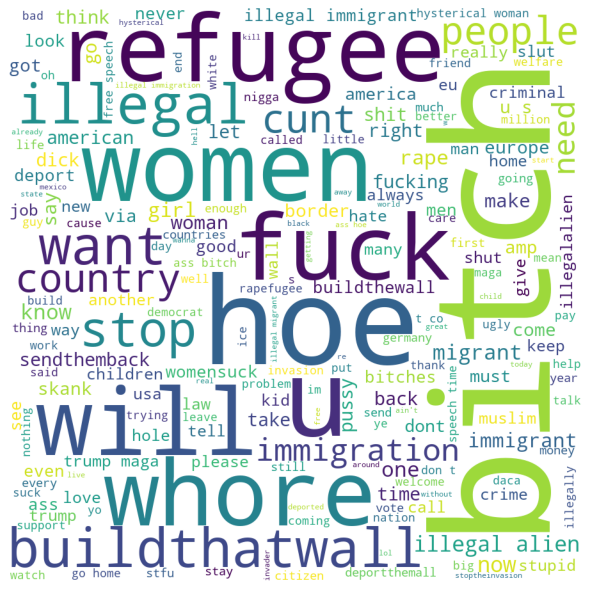

In [10]:
hate_tweets = hate_df[hate_df.Hate == 1]

tweet_words = ''
stopwords = set(STOPWORDS)
stopwords.add('user')

for tweet in hate_tweets.Tweet:
    tweet = str(tweet)
    tokens = tweet.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    tweet_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 900,
                     height = 900,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(tweet_words)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Offensive Tweet Word Cloud

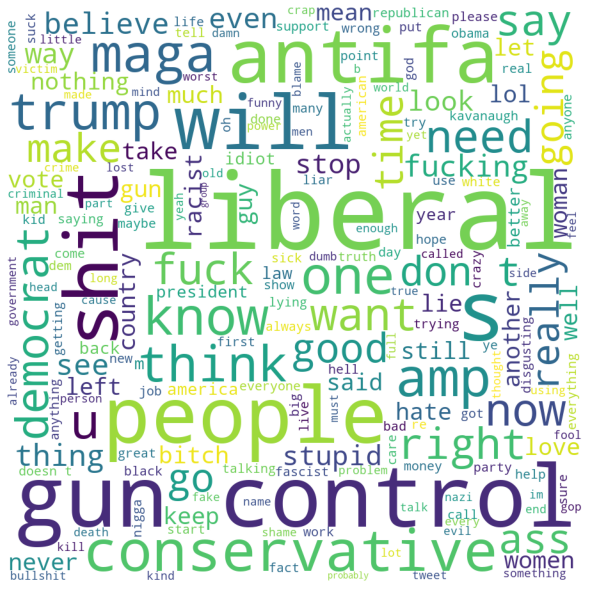

In [11]:
offensive_tweets = offensive_df[offensive_df.Offensive == 1]

tweet_words = ''
stopwords = set(STOPWORDS)
stopwords.add('user')

for tweet in offensive_tweets.Tweet:
    tweet = str(tweet)
    tokens = tweet.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    tweet_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 900,
                     height = 900,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(tweet_words)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Save Data

In [12]:
hate_df.to_csv('hate.csv', index=False)
offensive_df.to_csv('offensive.csv', index=False)
profanity_df.to_csv('profanity.csv', index=False)